## **회귀모델 알아보기**
### <b> <font color=green> [데이터 준비하기]     
### [회귀모델 구현하기] </font> </b>     
1) 사용 라이브러리 파악하고 가져오기    
2) 모델 객체 생성하고 학습하기   
3) 모델 예측하고 정확도 확인하기


## <font color=green>**[ 데이터 준비 ]**

### **Step 0 : 파일 다운로드하기**
- 아래 셀을 실행시켜 프로젝트에 사용할 데이터 파일을 colab 작업환경으로 다운로드한다.
> abalone.csv

In [ ]:
#colab 에서 사용시시
#!gdown 1Xkp9r_OE0TZKn1bTbSfCLD611K3pv7Cw

Downloading...
From: https://drive.google.com/uc?id=1Xkp9r_OE0TZKn1bTbSfCLD611K3pv7Cw
To: /content/abalone.csv
100% 196k/196k [00:00<00:00, 43.0MB/s]


### **Step 1 : 데이터 확인하기**
* 데이터 전처리에 사용되는 라이브러리를 가져온다.

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split

* 'abalone.csv'파일을 읽어 'df'에 저장한 후 내용을 출력한다.

In [67]:
df = pd.read_csv('data/abalone.csv')
df.head(3)

,Gender,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


* 데이터 정보를 파악한다.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


- Gender : 성별 (female, male, infant)
- Length : 길이
- Diameter : 직경
- Height : 높이
- Whole Weight : 전체 무게
- Shell Weight : 껍질 무게
- Shucked Weight : 껍질 벗긴 무게
- Viscera Weight : 내장 무게
- Rings : 전복 수명 (target)

### **step2. 데이터 준비하기**
- 특성 항목으로 'X'에 'Whole_weight'를, 타겟 항목으로 'y'에 'Rings'를 지정한다.

In [69]:
df['Gender'].value_counts()

Gender
M    1528
I    1342
F    1307
Name: count, dtype: int64

In [70]:
# One-Hot Encoding
df_1 = pd.get_dummies(df, columns=['Gender'], drop_first=True, dtype='int').head(3)
df_1

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Gender_I,Gender_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,0,0


In [71]:
#코드작성

# 단순 선형 회귀, 하나만 넣었을때
# X = df[['Shell_weight']].values
# y = df['Rings'].values

# 다중 선형 회귀
X1 = df_1.drop(['Rings'], axis=1).values
y1 = df_1['Rings'].values

- 학습 데이터와 테스트 데이터를 7:3의 비율로 나눈다.

In [72]:
#코드작성
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2, 9), (1, 9), (2,), (1,))

## <font color=green> **[기계학습 회귀 모델 구현]** </font>

### **step1. 라이브러리 가져오기**
- 선형회귀모델을 구현하기 위한 라이브러리를 가져온다.

In [74]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # MAE, MSE

### **Step 2 : 모델 객체 생성하기**  

- LinearRegression() 모델 객체 ‘model_lr‘을 생성한다.

In [75]:
#코드작성
model_lr = LinearRegression()

### **step3. 모델 학습하기**
- 선형 모델(model_ln)이 학습 데이터셋(X_train, y_train)으로 학습한다.

In [76]:
#코드작성
model_lr.fit(X_train, y_train)

LinearRegression()

### **step4.모델 예측하기**

1) 모델 예측하기
- 학습된 모델을 사용하여 테스트 데이터셋(X_test)에 대한 예측값을 ‘y_pred’ 에 저장한다.

In [77]:
y_pred = model_lr.predict(X_test)
y_pred

array([7.30503378])

- 테스트 데이터의 실제값인 y_test와 학습모델이 예측한 y_pred를 출력해본다.

In [78]:
df_result = pd.DataFrame(columns=['Actual', 'Predicted'])
#코드작성
df_result['Actual'] = y_test
df_result['Predicted'] = y_pred

# 한줄로 작성하는 법
# df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df_result

,Actual,Predicted
0,15,7.305034


2) 모델의 기울기와 절편 확인하기
- LinearRegression() 모델이 학습한 선형 회귀식의 기울기(coef_)와 절편 (intercept_)를 확인한다

In [79]:
#코드작성

print(f'기울기: {model_lr.coef_}')
print(f'절편: {model_lr.intercept_}')


기울기: [ 0.27372258  0.23570555  0.06843064  0.68658746  0.23874691  0.14142333
  0.21289534  0.         -1.52068098]
절편: 8.155914850229081


3) 모델로 예측한 최적합선 시각화하기

ValueError: x and y must be the same size

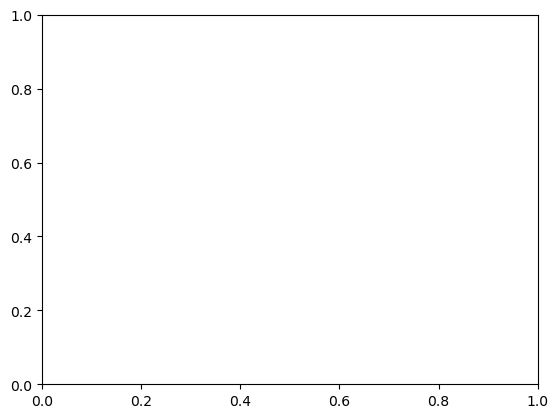

In [80]:
plt.figure()

#코드작성 : X_test, y_test 산점도를 그린다.
plt.scatter(X_test, y_test, color='gray')
#코드작성 : X_test, y_pred 선을 그린다.
plt.plot(X_test, y_pred, color='red', linewidth=2)
#코드작성 :  x축 label -'Whole_weight', y축 label - 'Rings' 로 표시한다.
plt.xlabel('Whole_weight')
plt.ylabel('Rings')
plt.show()


### **step5. 모델 평가하기**

- 평균 제곱 오차(MSE)와 평균 절대 오차(MAE) 그리고 결정계수(R2)을 이용하여 모델의 성능을 평가한다.

In [ ]:
print ("Linear Regression Score")
#코드작성 : mean_squared_error(), mean_absolute_error()를 출력한다.
print(f'MSE : {mean_squared_error(y_test, y_pred)}')
print(f'MAE : {mean_absolute_error(y_test, y_pred)}')

print ("R2: ", r2_score(y_test, y_pred))

# 최소한 R2가 0.5는 넘어야 써먹을 수 있을듯

Linear Regression Score
MSE : 59.21250517040599
MAE : 7.694966222824243
R2:  nan


c:\Users\STC\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## **선형회귀 모델 평가**
Sklearn.metrics
- 손실, 점수, 회기 성능 평가 함수 등 다양한 함수를 가지고 있음
- 예: mean_squared_error, explacined_evariance_score, r2_score

RMSE(Root Mean Square of Errors)
- RMSE는 평균 제곱근 오차를 나타냅니다.
- MSE의 Root를 씌운 평가지표
- 기계 학습 모델을 사용하여 예측을 수행할 때 예측이 정확한지 확인해야 합니다.
- RMSE는 예측 오류를 측정하는 방법입니다.
- RMSE가 높으면 예측이 나쁘고, 낮으면 예측이 좋은 것입니다.
- RMSE는 MSE와 같은 정보를 제공하지만, 그 해석이 더 직관적이라는 점에서 다릅니다. RMSE는 원래 데이터의 스케일에 맞춰진 오차의 평균 크기를 나타내므로, 모델의 성능을 평가하고 해석할 때 실제 값과 비교가 용이함

MSE(Mean Square of Errors)
- MSE는 평균제곱오차를 나타냅니다.
- 예측값 - 관측값(데이터값)의 제곱된 값의 평균을 구하는 것

MAE(Mean Absolute of Errors)
- MAE는 평균 절대 오차를 나타냅니다.
- RMSE와 마찬가지로 MAE는 예측의 오류를 측정하는 방법입니다.
- 모델의 예측값과 실제값의 차이를 모두 더하는 방식
- MAE가 높으면 예측이 나쁘고 그 반대의 경우 좋은 것입니다.

R2(R Squared Score) 결정계수
- 적합도를 측정하는 방법
- 실제 값과 실제 값의 평균 거리까지의 거리를 취한 뒤 이를 추정값과 비교하는 과정
- 실제 관측값의 분산대비 예측값의 분산을 계산하여 데이터 예측의 정확도 성능을 측정하는 지표
- 0~1까지 수로 나타내어지며 1에 가까울수록 100%의 설명력을 가진 모델이라고 평가를 하게된다
- 0과 1 사이에서 1에 가까울 수록 선형회귀 모델이 데이터에 대하여 높은 연관성을 가지고 있다고 해석할 수 있다.
- 다중선형회귀에서 특성이 많이 늘어날수록 R2 값이 오르는 경향도 있기 때문에, R2값에 대한 맹신은 하지 않도록 해야한다.

Explained variance score
- 설명 분산 점수
- 기존 SSR에서 Mean Error를 빼는 것으로 모델에서 나오는 오차가 0을 기준으로 왔다갔다 한다면 R2와 비슷
- 가장 좋은 최적의 값은 1.0이고 더 낮은 값일수록 더 나빠진다.

https://velog.io/@woooa/TIL-%EB%8B%A4%EC%A4%91%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EC%99%80-%ED%8F%89%EA%B0%80%EC%A7%80%ED%91%9C